Number of samples: 2000
Number of features: 26
Columns: Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')
   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  mu

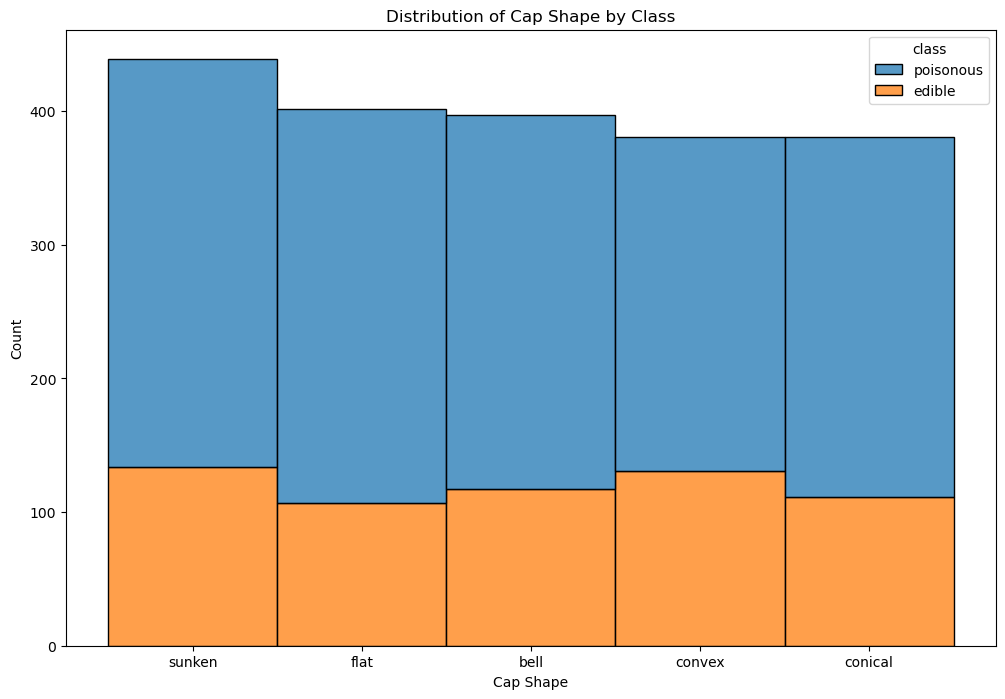

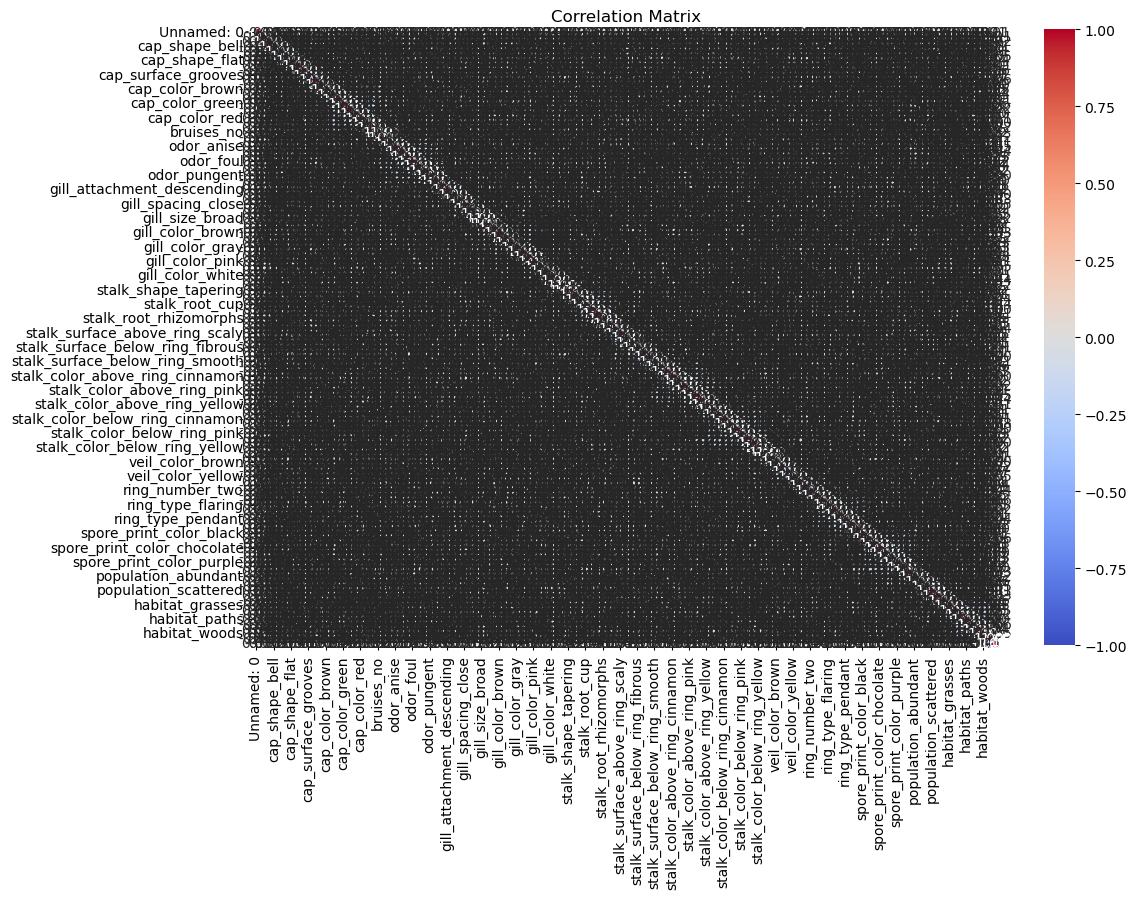

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Mushroom dataset
df = pd.read_csv(r"C:\Users\shiva\Downloads\SVM\SVM\mushroom.csv")

# Encode categorical variables
df_encoded = pd.get_dummies(df)

# Display basic information about the dataset
print("Number of samples:", len(df))
print("Number of features:", len(df.columns))
print("Columns:", df.columns)
print(df.head())

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Explore feature distributions using histograms or density plots
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='cap_shape', hue='class', multiple='stack')
plt.title('Distribution of Cap Shape by Class')
plt.xlabel('Cap Shape')
plt.ylabel('Count')
plt.show()

# Investigate feature correlations
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()




In [7]:
# Task 2: Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Split the dataset into training and testing sets
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (1600, 25) (1600,)
Testing set shape: (400, 25) (400,)


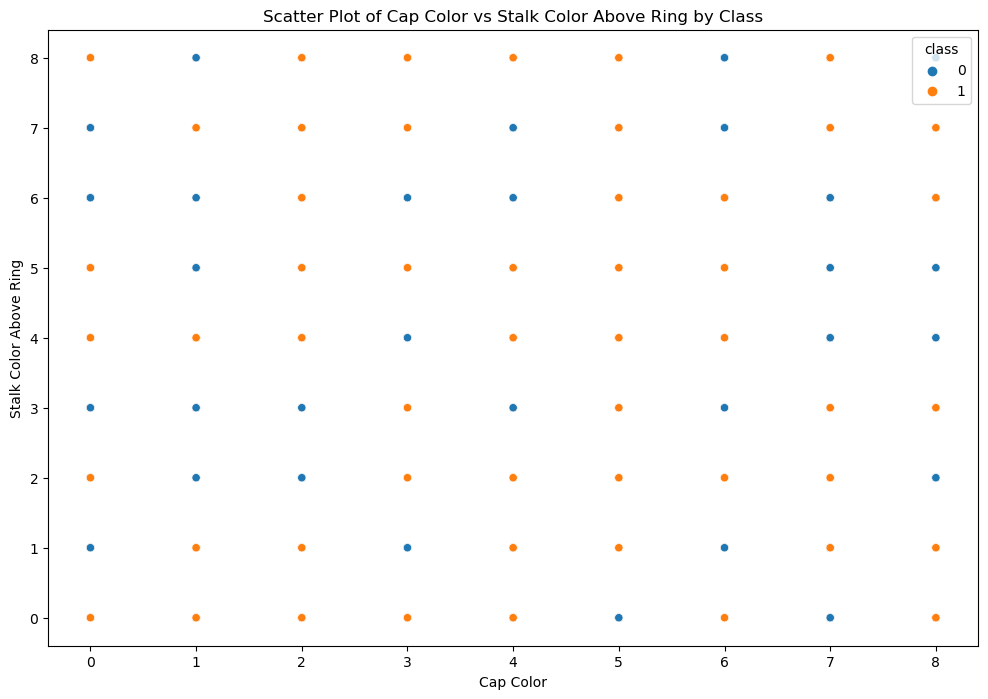

In [9]:
# Task 3: Data Visualization

# Scatter plots, pair plots, and class distributions can be visualized using seaborn or matplotlib

# Example code for scatter plot

# Replace hyphens with underscores in column names
df.columns = df.columns.str.replace('-', '_')

# Corrected scatter plot code
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='cap_color', y='stalk_color_above_ring', hue='class')
plt.title('Scatter Plot of Cap Color vs Stalk Color Above Ring by Class')
plt.xlabel('Cap Color')
plt.ylabel('Stalk Color Above Ring')
plt.show()


In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("SVM Classifier Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


SVM Classifier Performance:
Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0
F1-score: 0.800599700149925
